강사님이 주신 코드에 2개만 더 넣은 것
1. 이론
2. 코드복잡

### 가설1
캐글의 요문제가 log(a+1) 공식이니까, count 넣을 때부터 log(a+1)를 넣어보자

prediction할 땐, log를 다시 count로: np.exp(predictions) -1

cross 예측할 때, log(p+1) 항을 없애야

0.40583

### 이론1
#### 하나씩 다 해보는 게 정답

parameter: if~else 가지치기를 스스로 해주는 것

hyper-parameter: AI 가 못 찾는 거. 사람이 해줘야 함

tree별로 각기 다름

ex. RandomForestRegressior 검색해보면 밑에 인자 쭉- 뜨는 거

n_estimators, max_depth, max_features

이거 외에 다른건 요 3개의 응용

n_es..: 높을수록 좋다. tree를 얼마나 만들지. 단, 몇 개 이상부터는 크게 좋아지지 않음.
    tree가 몇개를 할당하든, 시간은 같음. 컴 성능의 한계치까지 적어넣기

max_depth: 너무 낮으면 분석력이 낮고, 너무 높으면 그 조건에 해당하는 모수가 부족해서 신뢰성이 낮음

max_fe..: 컬럼 샘플링. 0 아무 컬럼 안 씀. 0.5 컬럼 절반만 씀. 1 컬럼 다 씀
너무 낮아도, 너무 높아도 안 됨

In [1]:
import numpy as np
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [51]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 20)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [52]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


## Explore

In [6]:
%matplotlib inline
import seaborn as sns

### datetime

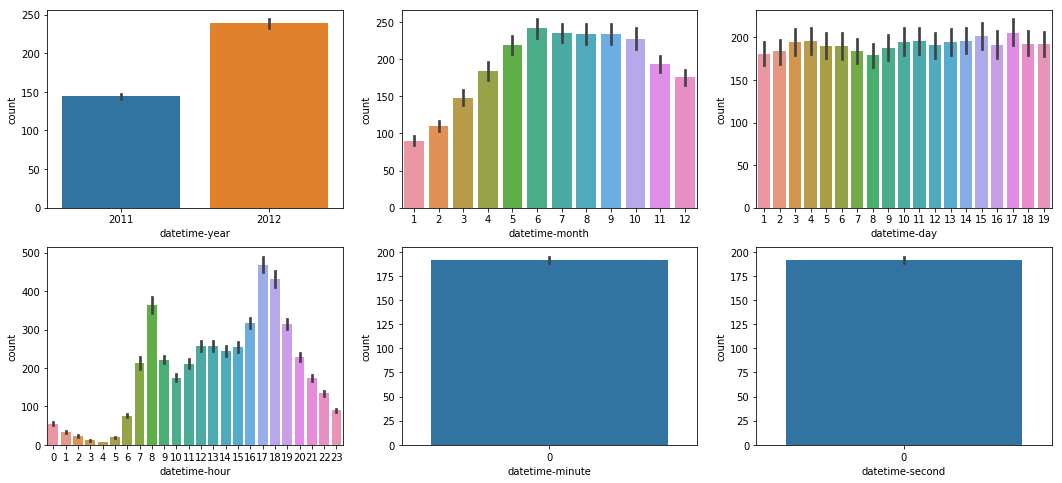

In [7]:
import matplotlib.pyplot as plt

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

In [8]:
# int == integer == 숫자
# str == string == 문자열
train["datetime-year_month"] = train["datetime-year"].astype('str') + "-" + train["datetime-month"].astype('str')

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 19)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


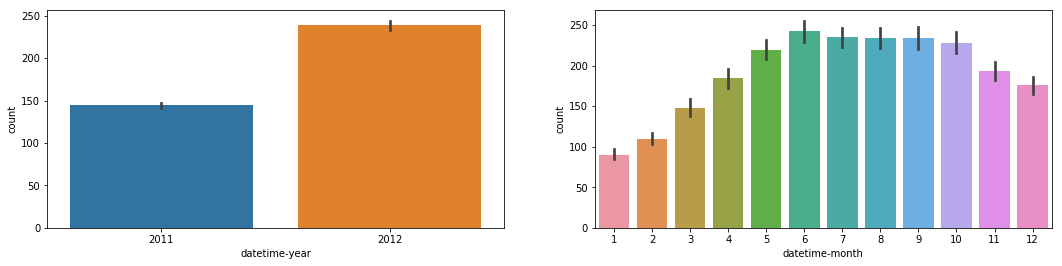

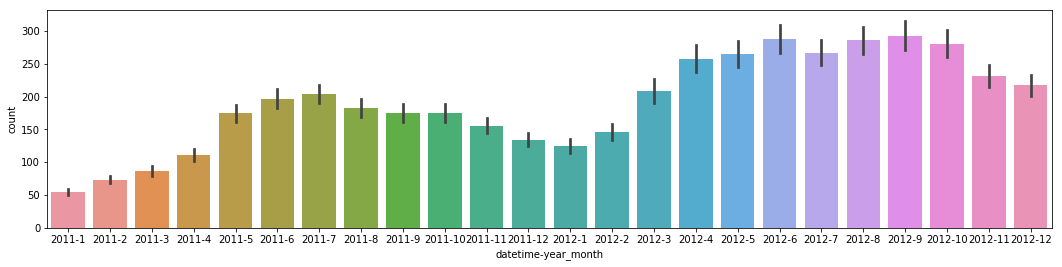

In [9]:
import matplotlib.pyplot as plt

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

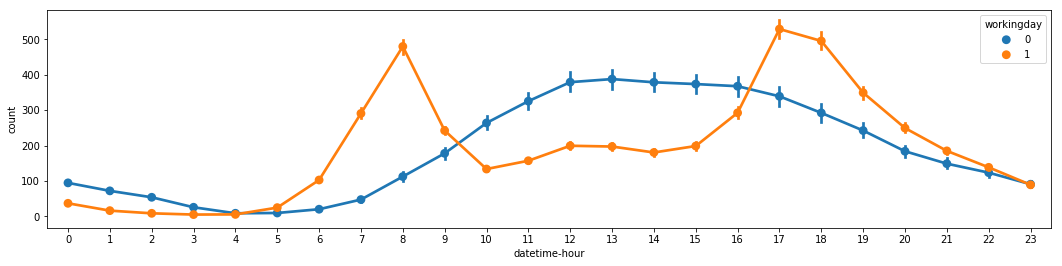

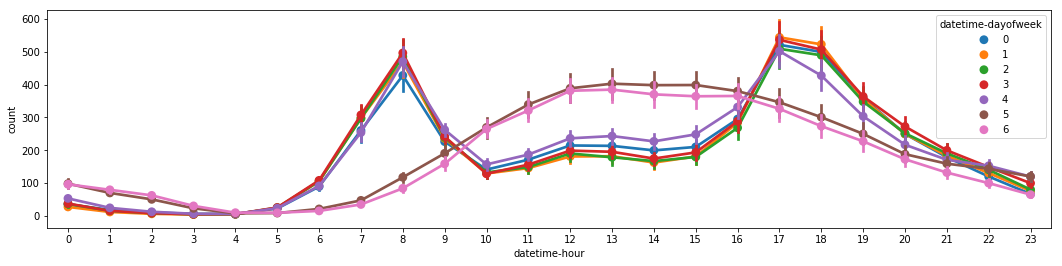

In [53]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

## Score

In [54]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [55]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [1]:
label_name = "count"

y_train = train[label_name]
#log+1
print(y_train.shape)
y_train.head()

NameError: name 'train' is not defined

In [57]:
from sklearn.ensemble import RandomForestRegressor

seed = 37

model = RandomForestRegressor(random_state=seed)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

** Score ** = Root Mean Squared Logarithmic Error, RMSLE.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [58]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
   
# 중복 로그 ㄴㄴ
#     log_predict = np.log(predict + 1)
#     log_actual = np.log(actual + 1)
    
#     difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [59]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmsle_score).mean()

print("Score = {0:.5f}".format(score))

Score = 0.37926


###  Tune Hyperparameters
0.39138 - 200위 안에 듦

###  case1- grid search
좋은 컴으로 반나절

하면 무조건 오름. 어떤 분야에서든 다 쓸 수 있음

단점. 제일 좋은건 찾기 힘들다. 맥뎊이 8이라던가, 맥피가 0.43268 이라던가

사람들이 자기 노하우 공개하는데, 그거 갖다서 튜닝만 좀 하면 상위 10% 가능 -> 이력서에 쓸 수 있음

83, 1000, ??

### case2- random search
이론상 가능한 범위에서 random으로 끊임없이 뽑기

np.random.randint??(1,100)

np.random.uniform(0.1,1.0)

100개 정돈 돌려봐야
> 쉬워보이나, 나름 최신기술

### case2+ Coarse/ finer
좀 덜 무식하게

random search를 2번 하기
- coarse: 0 아닌걸 버림
- finer: 상위권을 다시 random search

In [4]:
#tree개수는 적당값으로 고정하고, 다른거 다 튜닝했다 싶으면 값을 올리기
n_estimators= 100
# for ~ for 조합 다 해보자
#맥뎊list=[1,3,5,...]
#맥피list=[0.1, 0.3, ...]
#for 맥뎊 in 맥뎊list > for 맥피 in 맥피list > moel= RandomForestRegressor(n_es..= 뭐시기)

## Submit

In [60]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [61]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[:3]

(6493,)


array([ 10. ,   4. ,   3.8])

In [ ]:
# log 원복
# np.exp(predictions)

In [62]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.0
1,2011-01-20 01:00:00,4.0
2,2011-01-20 02:00:00,3.8
3,2011-01-20 03:00:00,3.4
4,2011-01-20 04:00:00,2.6


In [63]:
submission.to_csv("baseline-script.csv", index=False)